# Data Exploration


import packages

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import folium
import pickle
import os
import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [584]:
SURVEY_RESULT_PUBLIC = "https://raw.githubusercontent.com/Deena-Gergis/e2e_ds_project/batch_2/data/raw/survey_results_public.csv"

Read survey data

In [585]:
df = pd.read_csv(SURVEY_RESULT_PUBLIC)
df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


Raw data shape

In [586]:
df.shape

(83439, 48)

Explore sample of Raw data

In [587]:
df.sample(1).iloc[0]

ResponseId                                                                  74428
MainBranch                                         I am a developer by profession
Employment                                                     Employed full-time
Country                                                  United States of America
US_State                                                                  Florida
UK_Country                                                                    NaN
EdLevel                              Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Age1stCode                                                          11 - 17 years
LearnCode                                                  Books / Physical media
YearsCode                                                                      16
YearsCodePro                                                                   11
DevType                         Developer, front-end;Developer, full-stack;Dev...
OrgSize         

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [589]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


Why these columns have datatype "Object"?

In [590]:
questionable_cols = ['YearsCodePro', 'YearsCode','Age','Age1stCode']
for col in questionable_cols: 
    print(col)
    print(df[col].unique().tolist())
    print('--------------------------')
    print()

YearsCodePro
[nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1', '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14', '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23', '39', '41', '27', '28', '19', '33', 'More than 50 years', '37', '29', '32', '43', '40', '38', '45', '42', '46', '36', '44', '47', '48', '49']
--------------------------

YearsCode
[nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9', '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22', '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38', 'More than 50 years', '27', '41', '42', '35', '23', '28', '11', '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47', '49', '48']
--------------------------

Age
['25-34 years old', '18-24 years old', '35-44 years old', 'Prefer not to say', '45-54 years old', 'Under 18 years old', '65 years or older', '55-64 years old', nan]
--------------------------

Age1stCode
['18 - 24 years', '11 - 17 years', 

Number of unique values of each column in data

In [591]:
df.nunique()

ResponseId                      83439
MainBranch                          6
Employment                          9
Country                           181
US_State                           55
UK_Country                          4
EdLevel                             9
Age1stCode                          9
LearnCode                         458
YearsCode                          52
YearsCodePro                       52
DevType                          8626
OrgSize                            10
Currency                          146
CompTotal                        3752
CompFreq                            3
LanguageHaveWorkedWith          28690
LanguageWantToWorkWith          27545
DatabaseHaveWorkedWith           3072
DatabaseWantToWorkWith           3137
PlatformHaveWorkedWith            118
PlatformWantToWorkWith            126
WebframeHaveWorkedWith           5402
WebframeWantToWorkWith           5113
MiscTechHaveWorkedWith           1387
MiscTechWantToWorkWith           1684
ToolsTechHav

In [592]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [593]:
df["EdLevel"].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          35357
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       17512
Some college/university study without earning a degree                                10589
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9534
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2567
Primary/elementary school                                                              2479
Associate degree (A.A., A.S., etc.)                                                    2231
Something else                                                                         1601
Professional degree (JD, MD, etc.)                                                     1256
Name: EdLevel, dtype: int64

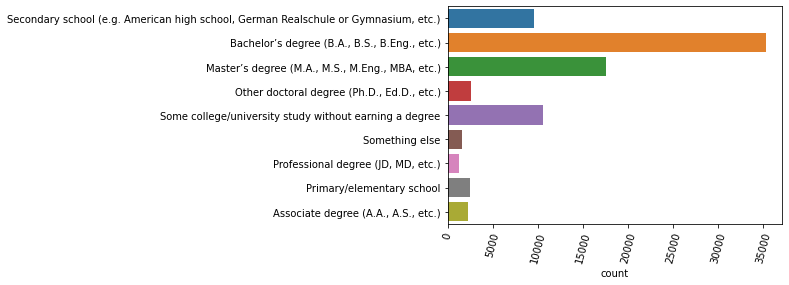

In [594]:
sns.countplot(y=df.EdLevel)
plt.xticks(rotation=75);
plt.ylabel(None);

In [595]:
#df.DevType.value_counts()

Percentage of null values in each column

In [596]:
for col in df.columns: 
    print(f"{col}:\t{df[col].isnull().mean() * 100:.2f}%")

ResponseId:	0.00%
MainBranch:	0.00%
Employment:	0.14%
Country:	0.00%
US_State:	82.12%
UK_Country:	94.71%
EdLevel:	0.38%
Age1stCode:	0.23%
LearnCode:	0.57%
YearsCode:	2.15%
YearsCodePro:	26.63%
DevType:	20.32%
OrgSize:	27.22%
Currency:	26.80%
CompTotal:	43.45%
CompFreq:	37.50%
LanguageHaveWorkedWith:	1.30%
LanguageWantToWorkWith:	7.93%
DatabaseHaveWorkedWith:	16.65%
DatabaseWantToWorkWith:	30.13%
PlatformHaveWorkedWith:	37.52%
PlatformWantToWorkWith:	50.12%
WebframeHaveWorkedWith:	26.05%
WebframeWantToWorkWith:	37.57%
MiscTechHaveWorkedWith:	43.61%
MiscTechWantToWorkWith:	54.43%
ToolsTechHaveWorkedWith:	13.07%
ToolsTechWantToWorkWith:	21.52%
NEWCollabToolsHaveWorkedWith:	2.64%
NEWCollabToolsWantToWorkWith:	12.48%
OpSys:	0.17%
NEWStuck:	0.46%
NEWSOSites:	0.32%
SOVisitFreq:	1.23%
SOAccount:	1.10%
SOPartFreq:	19.04%
SOComm:	1.34%
NEWOtherComms:	0.73%
Age:	1.24%
Gender:	1.38%
Trans:	3.31%
Sexuality:	12.07%
Ethnicity:	4.76%
Accessibility:	6.99%
MentalHealth:	7.81%
SurveyLength:	2.07%
SurveyE

In [597]:
df["Gender"].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [598]:
df.Country.nunique()

181

In [599]:
top_countries = df.Country.value_counts().head(15)
top_countries

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Name: Country, dtype: int64

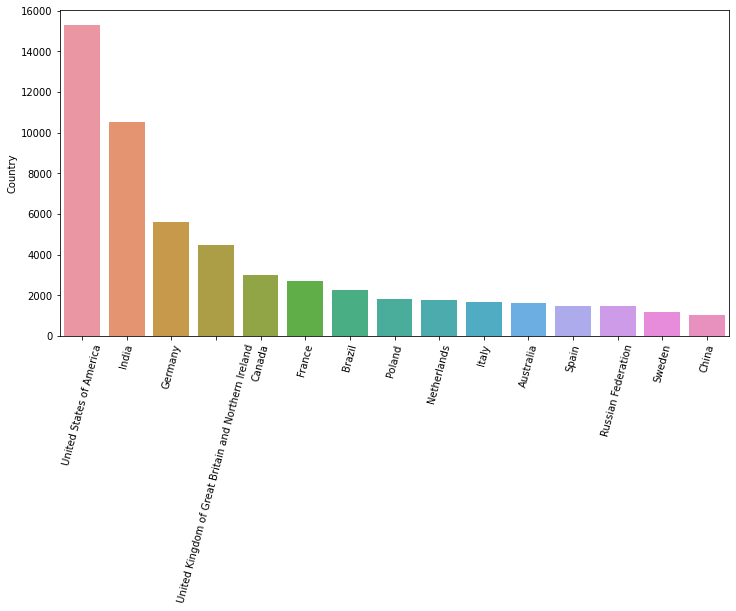

In [600]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
#plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

In [601]:
df.where(~(df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [602]:
df.Gender.value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

In [603]:
gender_counts = df.Gender.value_counts()
gender_counts

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

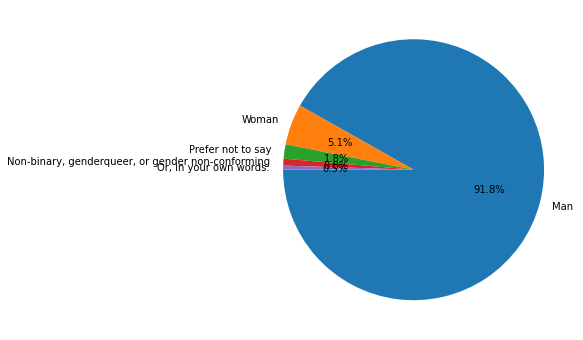

In [604]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);



---

---



---





# Data Preprocessing

In [605]:
REPLACE_DICT = {
    'YearsCodePro': {'Less than 1 year': 0, 'More than 50 years': 51}, 
    'YearsCode':    {'Less than 1 year': 0, 'More than 50 years': 51}}

In [606]:
df["Age"].unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', nan, '55-64 years old'], dtype=object)

In [607]:
def split_answers(data_series, delimiter=";"):
    """ 
    Split multiple answers in a single string 
    to a list of single strings each represnting a single answers 

    Parameters:
    * data_series (pd.Series): String series with answers 
    * delimiter (string): Another decimal integer 
                          Defaults to ";"

    Returns: (pd.Series): If column contains 
    """
    
    # Sub functions 
    def is_splittable(pd_series, delimiter):
        """ Check if results multiple should be splitted - Returns boolean """    
        return pd_series.str.contains(delimiter)
    
    def split_answer(pd_series, delimiter): 
        """Function to split single answer"""
        return pd_series.str.split(delimiter)
    
    # --------------------
    
    # Check if multiple answers exist - if none: return original 
    splittable_values = is_splittable(data_series, delimiter)
    if not splittable_values.any():
        return data_series
    
    # Else, split each value to a list 
    modified_series = split_answer(data_series, delimiter)    
    
    # Replace NAs with empty lists 
    mask_null = modified_series.isnull()
    modified_series.loc[mask_null] = modified_series.loc[mask_null].apply(lambda x: [])
    
    return modified_series

In [608]:
raw_df = pd.read_csv(SURVEY_RESULT_PUBLIC)
df = raw_df.copy()

In [609]:
for col, replacement in REPLACE_DICT.items():
    df[col] = df[col].replace(replacement).astype(np.float32)

In [610]:
object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
    df[col] = split_answers(df[col])

In [611]:
i = df.sample(1).index[0]
print(raw_df['LanguageHaveWorkedWith'].iloc[i])
print(df['LanguageHaveWorkedWith'].iloc[i])

Bash/Shell;C;C++;HTML/CSS;Java;Python;SQL
['Bash/Shell', 'C', 'C++', 'HTML/CSS', 'Java', 'Python', 'SQL']


In [612]:
i = df.sample(1).index[0]
print(raw_df['DevType'].iloc[i])
print(df['DevType'].iloc[i])

nan
[]


In [613]:
i = df.sample(1).index[0]
print(raw_df['YearsCodePro'].iloc[i])
print(df['YearsCodePro'].iloc[i])

16
16.0


In [614]:
PickleData = df



---



---



# Data Analysis

In [615]:
ROLES_DF = "https://raw.githubusercontent.com/Deena-Gergis/e2e_ds_project/master/data/raw/roles_short_names.csv"
ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']

In [616]:
roles_names = pd.read_csv(ROLES_DF, sep=';')

In [617]:
#df = raw_df.copy()
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df

In [618]:
df = pd.concat(encoded_dfs, axis=1)
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [619]:
jobs_freq = df['DevType'].copy().sum().sort_values().reset_index()
jobs_freq

,index,0
0,Marketing or sales professional,638
1,Scientist,2015
2,"Senior Executive (C-Suite, VP, etc.)",2103
3,"Developer, game or graphics",2112
4,Educator,2369
5,"Engineer, site reliability",2448
6,Academic researcher,2899
7,Product manager,3074
8,Other (please specify):,3545
9,"Developer, QA or test",3611


In [620]:
# Calculate the sum for all cols except Devtypes
skills_freq = df.copy().drop('DevType', axis=1).sum().reset_index()
skills_freq.columns = ['group', 'skill', 'freq']
skills_freq.sort_values('freq', ascending=False)


,group,skill,freq
95,ToolsTechHaveWorkedWith,Git,68171
122,NEWCollabToolsHaveWorkedWith,Visual Studio Code,58026
19,LanguageHaveWorkedWith,JavaScript,53587
16,LanguageHaveWorkedWith,HTML/CSS,46259
29,LanguageHaveWorkedWith,Python,39792
...,...,...,...
12,LanguageHaveWorkedWith,Erlang,651
0,LanguageHaveWorkedWith,APL,536
8,LanguageHaveWorkedWith,Crystal,466
6,LanguageHaveWorkedWith,COBOL,437


In [621]:
fig = px.treemap(skills_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',color='freq')

fig.update_layout(width=1400, height=700)
fig.show()

In [622]:
sorted_roles = df['DevType'].sum().sort_values().index.tolist()
sorted_skills = df.drop('DevType', axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [623]:
skills = []

# For each role, calculate the percentage of each skill
for role in sorted_roles:
    # Filter for the role
    role_mask = (df[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100
                             for tech_col in TECH_COLS})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T


In [624]:
skills

,Git,Visual Studio Code,JavaScript,HTML/CSS,Python,SQL,Docker,MySQL,Java,AWS,...,Oracle Cloud Infrastructure,Chef,Flow,F#,TextMate,Erlang,APL,Crystal,COBOL,Pulumi
Marketing or sales professional,70.062696,61.285266,71.943574,71.316614,40.909091,57.053292,32.601881,54.075235,27.586207,43.260188,...,7.366771,5.642633,4.545455,4.388715,5.172414,3.761755,5.642633,4.231975,3.761755,3.761755
Scientist,81.687345,52.109181,42.431762,40.049628,76.079404,34.937965,43.672457,31.910670,25.607940,32.158809,...,2.382134,1.935484,2.034739,2.133995,2.630273,1.935484,2.431762,1.588089,1.637717,0.942928
"Senior Executive (C-Suite, VP, etc.)",84.688540,66.096053,77.223015,63.195435,43.747028,59.771755,58.297670,46.742748,30.147408,59.486448,...,2.567760,2.995720,2.092249,2.948169,3.185925,2.900618,1.997147,1.854494,2.092249,2.234903
"Developer, game or graphics",84.375000,72.206439,64.914773,55.160985,46.543561,41.145833,39.299242,43.844697,36.789773,34.753788,...,2.556818,1.846591,2.414773,2.793561,2.367424,2.035985,1.893939,1.373106,1.609848,1.136364
Educator,82.566484,65.512875,66.483748,60.869565,51.878430,50.189954,45.462220,47.868299,35.500211,36.513297,...,2.659350,2.279443,2.532714,2.321655,2.448290,1.857324,2.237231,1.477417,1.772900,1.308569
"Engineer, site reliability",89.011438,67.606209,64.174837,52.205882,60.294118,57.843137,73.202614,49.550654,35.334967,60.825163,...,3.472222,6.699346,2.410131,1.919935,2.165033,3.145425,1.511438,1.633987,1.552288,2.900327
Academic researcher,80.131080,54.294584,44.394619,40.669196,72.093825,34.356675,43.118317,36.081407,28.285616,28.941014,...,2.311142,1.552259,1.759227,1.621249,1.897206,1.552259,2.690583,1.310797,1.552259,0.758882
Product manager,83.702017,70.364346,75.829538,66.070267,41.184125,59.694209,49.414444,50.390371,31.067014,47.462589,...,2.439818,2.407287,2.179571,2.016916,2.179571,1.821731,1.626545,1.919323,1.626545,1.073520
Other (please specify):,75.994358,61.100141,57.122708,50.126939,49.957687,43.638928,39.774330,35.430183,28.716502,32.863188,...,1.720733,1.861777,1.100141,1.607898,1.354020,1.071932,1.664316,1.015515,1.156559,0.818054
"Developer, QA or test",86.901135,69.426752,72.445306,62.088064,47.576849,60.814179,52.783163,49.598449,40.847411,41.678205,...,2.215453,2.326225,2.076987,1.855442,1.661590,1.633896,1.301579,1.384658,1.301579,1.024647


In [625]:
fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()

In [626]:
roles_short_dict = roles_names.set_index('Original name')["Short name "].to_dict()
short_labels = [roles_short_dict[role] 
                for role in sorted_roles]

In [627]:
fig = ff.create_dendrogram(skills, labels=short_labels, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

In [628]:
std_skills = StandardScaler().fit_transform(skills)
std_skills = pd.DataFrame(std_skills, columns=skills.columns, index=skills.index)

In [629]:
fig = go.Figure(data=go.Heatmap(z=std_skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()


In [630]:
sorted_roles

['Marketing or sales professional',
 'Scientist',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Educator',
 'Engineer, site reliability',
 'Academic researcher',
 'Product manager',
 'Other (please specify):',
 'Developer, QA or test',
 'Data or business analyst',
 'Engineering manager',
 'Engineer, data',
 'Student',
 'Data scientist or machine learning specialist',
 'Developer, embedded applications or devices',
 'Designer',
 'Database administrator',
 'System administrator',
 'DevOps specialist',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']

In [631]:
#role = np.random.choice(sorted_roles)
# role = 'Developer, embedded applications or devices'
# role = 'Data scientist or machine learning specialist'
# role = 'Developer, back-end'
role = 'Product manager'

In [632]:
single_role_skills = pd.concat([skills.loc[role], std_skills.loc[role]], axis=1)
single_role_skills.columns = ['percentage', 'specificity']
single_role_skills = single_role_skills.sort_values('percentage')

In [633]:
threshold = 25

single_role_skills = single_role_skills[single_role_skills['percentage'] > threshold]

fig = px.bar(df, 
             y=single_role_skills.index, 
             x=single_role_skills['percentage'], 
             color=single_role_skills['specificity'], 
             color_continuous_scale='orrd', 
             range_color=[std_skills.values.min(),std_skills.values.max()],
             orientation='h')

fig.update_layout(width=800, height=800, title=role)
fig.show()

In [634]:
df.shape

(83439, 150)



---



---



---



# Feature Engineering

In [635]:
NA_STRING = 'Not Specified'
TRANSPARENT_STRING = 'rgba(0, 0, 0, 0)'

In [636]:
df = PickleData

In [637]:
# One hot encode 
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                               columns=binarizer.classes_,
                               index=df[col].index)
    encoded_dfs[col] = encoded_df
    
# Merge 1-hot encoded 
ohe_df = pd.concat(encoded_dfs, axis=1)

In [638]:
# Prepare sub data frames 
skills_ohe = ohe_df.drop('DevType', axis=1).copy()
std_skills = StandardScaler().fit_transform(skills_ohe)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



In [639]:
tsne_projection = TSNE(n_components=2, 
                       perplexity=3,
                       learning_rate=0.01,
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=2, 
                       n_iter=10**10,
                       random_state=0).fit_transform(std_skills.T)

tsne_projection = pd.DataFrame(tsne_projection, index=skills_ohe.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [640]:
tsne_projection.shape

(125, 2)

In [641]:
fig = px.scatter(x=tsne_projection[0], y=tsne_projection[1], text=tsne_projection.droplevel(0).index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000, width=1000, title_text='TSNE')
fig.show()

In [642]:
range_n_cluster = list(range(10,25))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    cluster_model  = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = cluster_model.fit_predict(tsne_projection)
    
    silhouette_avg = silhouette_score(tsne_projection, cluster_labels)
    silhoutte_score += [silhouette_avg]
    
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = cluster_model

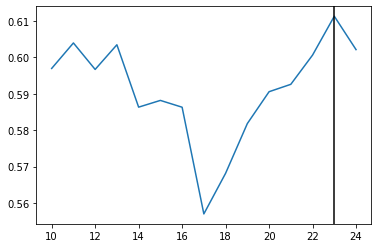

In [643]:
plt.plot(range_n_cluster, silhoutte_score)
plt.axvline(best_cluster_model.n_clusters, color='black')

In [644]:
cluster_labels = ["skills_group_" + str(label) 
                 for label in best_cluster_model.labels_]

In [645]:
fig = px.scatter(x=tsne_projection[0], 
                 y=tsne_projection[1], 
                 text=tsne_projection.droplevel(0).index, 
                 color=cluster_labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

In [646]:
# How to better write this
skills_clusters = tsne_projection.index.droplevel(0).to_series().groupby(cluster_labels).apply(list)

In [647]:
for cluster, skills in skills_clusters.items():
    print(cluster)
    print(skills)

skills_group_0
['Groovy', 'Java', 'Oracle', 'Oracle Cloud Infrastructure', 'Spring', 'Atom', 'Eclipse', 'IntelliJ', 'NetBeans', 'Sublime Text']
skills_group_1
['Matlab', 'Python', 'Django', 'FastAPI', 'Flask', 'NumPy', 'Pandas', 'IPython/Jupyter', 'PyCharm']
skills_group_10
['Dart', 'Kotlin', 'Firebase', 'SQLite', 'Google Cloud Platform', 'Flutter', 'Android Studio']
skills_group_11
['Assembly', 'C', 'C++', 'Qt']
skills_group_12
['Scala', 'Apache Spark', 'Hadoop']
skills_group_13
['HTML/CSS', 'JavaScript', 'jQuery', 'Visual Studio Code']
skills_group_14
['Bash/Shell', 'Perl', 'Vim']
skills_group_15
['Julia', 'R', 'RStudio']
skills_group_16
['Unity 3D', 'Unreal Engine']
skills_group_17
['Objective-C', 'Swift', 'Xcode']
skills_group_18
['Svelte', 'Deno']
skills_group_19
['TypeScript', 'Angular', 'Angular.js', 'Cordova']
skills_group_2
['C#', 'F#', 'PowerShell', 'VBA', 'Microsoft SQL Server', 'Microsoft Azure', 'ASP.NET', 'ASP.NET Core ', '.NET Core / .NET 5', '.NET Framework', 'Xamarin',